In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , LSTM , GRU , SimpleRNN
from tensorflow.keras.utils import plot_model

# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# **ِData**

In [ ]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Read data 
data = pd.read_csv('/gdrive/My Drive/RNN_M/BTCUSD_YahooFinance.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1097 non-null   object 
 1   Open       1097 non-null   float64
 2   High       1097 non-null   float64
 3   Low        1097 non-null   float64
 4   Close      1097 non-null   float64
 5   Adj Close  1097 non-null   float64
 6   Volume     1097 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.1+ KB


In [ ]:
closedf = data['Close']
closedf.shape

(1097,)

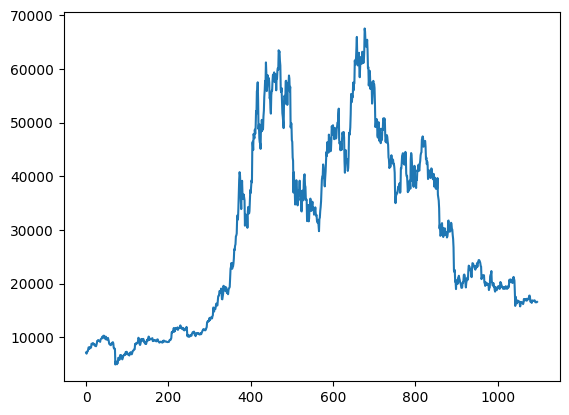

In [ ]:
plt.plot(closedf)

In [ ]:
scaler=MinMaxScaler()
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1097, 1)


In [ ]:
training_size=675
validation_size=211
test_size=len(closedf)-training_size-validation_size
val_data,train_data,test_data=closedf[0:validation_size,:],closedf[validation_size:training_size+validation_size,:],closedf[training_size+validation_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("val_data: ", val_data.shape)

train_data:  (675, 1)
test_data:  (211, 1)
val_data:  (211, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_val,y_val = create_dataset(val_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
print("X_val: ", X_val.shape)
print("y_val", y_val.shape)

X_train:  (664, 10)
y_train:  (664,)
X_test:  (200, 10)
y_test (200,)
X_val:  (200, 10)
y_val (200,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("X_val: ", X_val.shape)

X_train:  (664, 10, 1)
X_test:  (200, 10, 1)
X_val:  (200, 10, 1)


In [ ]:
es1 = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=5)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))
orginial_yval = scaler.inverse_transform(y_val.reshape(-1,1))

#**Models**

## **LSTM**

In [ ]:
model1=Sequential()
model1.add(LSTM(256,input_shape=(None,1),activation="relu"))
model1.add(Dense(128))
model1.add(Dropout(0.2))
#model1.add(LSTM(32,input_shape=(None,1),activation="relu"))
model1.add(Dense(32))
model1.add(Dense(1))
adam = op
model1.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30,batch_size=128,verbose=1,callbacks=[es1])

Epoch 1/30
6/6 [==============================] - 5s 134ms/step - loss: 0.1623 - val_loss: 0.0508
Epoch 2/30
6/6 [==============================] - 0s 78ms/step - loss: 0.0427 - val_loss: 0.0206
Epoch 3/30
6/6 [==============================] - 0s 74ms/step - loss: 0.0161 - val_loss: 0.0115
Epoch 4/30
6/6 [==============================] - 0s 79ms/step - loss: 0.0137 - val_loss: 0.0243
Epoch 5/30
6/6 [==============================] - 0s 75ms/step - loss: 0.0090 - val_loss: 0.0251
Epoch 6/30
6/6 [==============================] - 0s 82ms/step - loss: 0.0072 - val_loss: 0.0123
Epoch 7/30
6/6 [==============================] - 0s 74ms/step - loss: 0.0062 - val_loss: 0.0085
Epoch 8/30
6/6 [==============================] - 0s 78ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 9/30
6/6 [==============================] - 0s 76ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 10/30
6/6 [==============================] - 0s 76ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 11/30
6/6 [===========

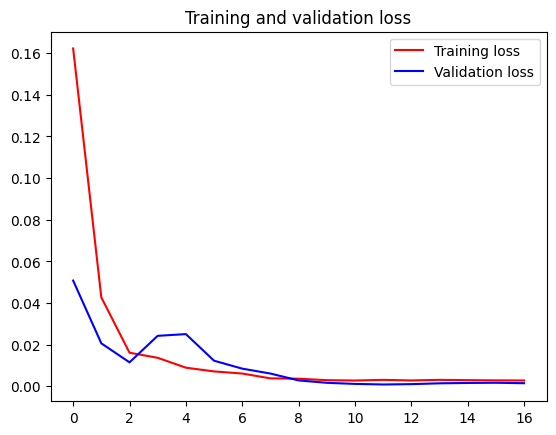

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
lstm_train_predict=model1.predict(X_train)
lstm_test_predict=model1.predict(X_test)

7/7 [==============================] - 0s 11ms/step


In [ ]:
# Transform back to original form

lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

In [ ]:
# Evaluation metrices RMSE and MAE
print("LSTM Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,lstm_train_predict)))
print("LSTM Train data MAE: ", mean_absolute_error(original_ytrain,lstm_train_predict))
print("-------------------------------------------------------------------------------------")
print("LSTM Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,lstm_test_predict)))
print("LSTM Test data MAE: ", mean_absolute_error(original_ytest,lstm_test_predict))

LSTM Train data RMSE:  2445.5718757651166
LSTM Train data MAE:  1850.9166671728165
-------------------------------------------------------------------------------------
LSTM Test data RMSE:  1055.8941455002077
LSTM Test data MAE:  735.0705761493748


## **GRU**

In [ ]:
model2 = Sequential()

model2.add(GRU(256, input_shape=(X_train.shape[1], 1 ), activation = 'relu'))
model2.add(Dense(128))
model2.add(Dropout(0.2))
model2.add(Dense(32))
model2.add(Dense(1))

model2.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30,batch_size=32,verbose=1,callbacks=[es1])

Epoch 1/30
21/21 [==============================] - 5s 50ms/step - loss: 0.0504 - val_loss: 0.0141
Epoch 2/30
21/21 [==============================] - 1s 34ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/30
21/21 [==============================] - 1s 35ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 4/30
21/21 [==============================] - 1s 32ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5/30
21/21 [==============================] - 1s 32ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 6/30
21/21 [==============================] - 1s 34ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 7/30
21/21 [==============================] - 1s 33ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/30
21/21 [==============================] - 1s 58ms/step - loss: 0.0021 - val_loss: 9.1553e-04
Epoch 9/30
21/21 [==============================] - 1s 62ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 10/30
21/21 [==============================] - 1s 59ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch

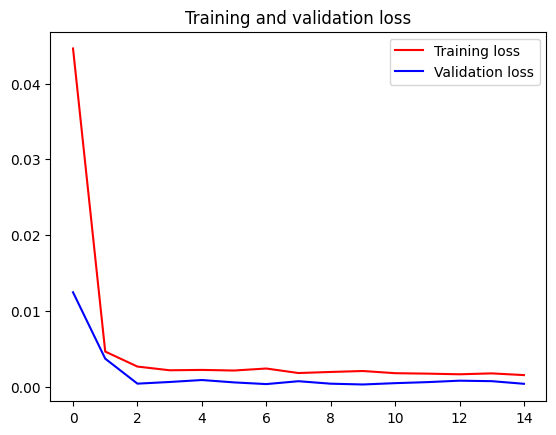

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
gru_train_predict=model2.predict(X_train)
gru_test_predict=model2.predict(X_test)

7/7 [==============================] - 0s 14ms/step


In [ ]:
gru_train_predict = scaler.inverse_transform(gru_train_predict)
gru_test_predict = scaler.inverse_transform(gru_test_predict)

In [ ]:
# Evaluation metrices RMSE and MAE
print("GRU Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,gru_train_predict)))
print("GRU Train data MAE: ", mean_absolute_error(original_ytrain,gru_train_predict))
print("-------------------------------------------------------------------------------------")
print("GRU Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,gru_test_predict)))
print("GRU Test data MAE: ", mean_absolute_error(original_ytest,gru_test_predict))

GRU Train data RMSE:  1767.6072853094352
GRU Train data MAE:  1297.525949532097
-------------------------------------------------------------------------------------
GRU Test data RMSE:  699.8754173794354
GRU Test data MAE:  488.81744629906257


## **RNN**

In [ ]:
model3 = Sequential()

model3.add(SimpleRNN(256, input_shape=(X_train.shape[1], 1 ), activation = 'relu'))

model3.add(Dense(128))
model3.add(Dropout(0.2))
model3.add(Dense(32))
model3.add(Dense(1))

model3.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30,batch_size=32,verbose=1,callbacks=[es1])

Epoch 1/30
21/21 [==============================] - 2s 28ms/step - loss: 0.0361 - val_loss: 0.0033
Epoch 2/30
21/21 [==============================] - 0s 19ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 3/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 4/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 3.8958e-04
Epoch 5/30
21/21 [==============================] - 0s 18ms/step - loss: 0.0019 - val_loss: 5.0024e-04
Epoch 6/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 4.7017e-04
Epoch 7/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 4.0721e-04
Epoch 8/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 2.8233e-04
Epoch 9/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 4.6403e-04
Epoch 10/30
21/21 [==============================] - 0s 18ms/step - loss: 0.0016 - va

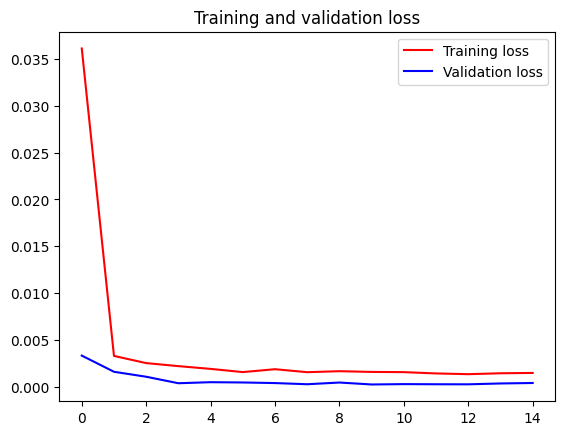

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
rnn_train_predict=model3.predict(X_train)
rnn_test_predict=model3.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [ ]:
rnn_train_predict = scaler.inverse_transform(rnn_train_predict)
rnn_test_predict = scaler.inverse_transform(rnn_test_predict)

In [ ]:
# Evaluation metrices RMSE and MAE
print("RNN Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,rnn_train_predict)))
print("RNN Train data MAE: ", mean_absolute_error(original_ytrain,rnn_train_predict))
print("-------------------------------------------------------------------------------------")
print("RNN Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,rnn_test_predict)))
print("RNN Test data MAE: ", mean_absolute_error(original_ytest,rnn_test_predict))

RNN Train data RMSE:  1585.0401029168397
RNN Train data MAE:  1104.9660453222893
-------------------------------------------------------------------------------------
RNN Test data RMSE:  642.711605404357
RNN Test data MAE:  431.854072248125


In [ ]:
model3.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 256)               66048     
                                                                 
 dense_210 (Dense)           (None, 128)               32896     
                                                                 
 dropout_52 (Dropout)        (None, 128)               0         
                                                                 
 dense_211 (Dense)           (None, 32)                4128      
                                                                 
 dense_212 (Dense)           (None, 1)                 33        
                                                                 
Total params: 103,105
Trainable params: 103,105
Non-trainable params: 0
_________________________________________________________________


# **Comparision**

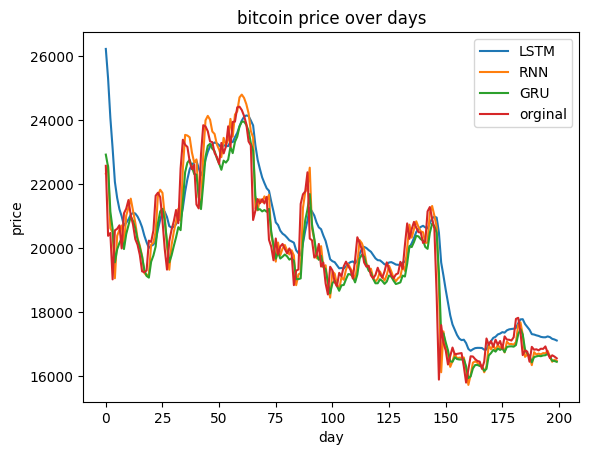

In [ ]:
plt.plot(lstm_test_predict , label='LSTM')
plt.plot(rnn_test_predict, label='RNN')
plt.plot(gru_test_predict, label='GRU')
plt.plot(original_ytest , label = "orginal")
plt.title("bitcoin price over days")
plt.xlabel("day")
plt.ylabel("price")
plt.legend()